## Observations and Insights 

1. There were 239 mice involved in this study, however there was an error with mouse g989 so it's data was removed, leaving 238 mice to work with.
2. Capomulin and Ramicane are the most effective drugs in treating tumors amongst mice.
3. The correlation between a mouse's weight and the average tumor volume is 0.84, indicating a strong correlation.


In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

plt.ioff()

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Checking the number of mice.
mice = combined_df['Mouse ID'].nunique()
mice

249

In [100]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df[combined_df['Mouse ID']=='g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [103]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats = clean_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]
groupby_stats = summary_stats.groupby(['Drug Regimen'])

groupby_summary = pd.DataFrame({
    'Mean': groupby_stats['Tumor Volume (mm3)'].mean().map('{:.2f}'.format),
    'Median': groupby_stats['Tumor Volume (mm3)'].median().map('{:.2f}'.format),
    'Variance': groupby_stats['Tumor Volume (mm3)'].var().map('{:.2f}'.format),
    'Standard Deviation': groupby_stats['Tumor Volume (mm3)'].std().map('{:.2f}'.format),
    'SEM': groupby_stats['Tumor Volume (mm3)'].sem().map('{:.2f}'.format),
})

groupby_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = groupby_stats.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_summary.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

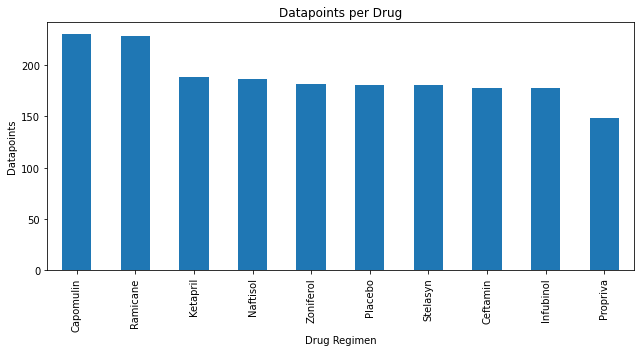

In [106]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_data_df['Drug Regimen'].value_counts().plot(kind='bar', figsize=(9,5))

plt.title('Datapoints per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Datapoints')
plt.tight_layout()
plt.show()


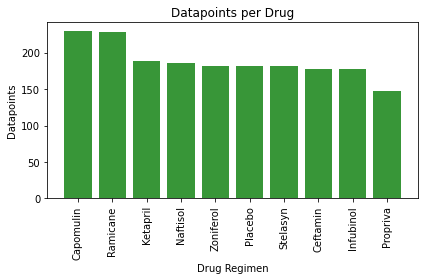

In [107]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mouse_count = clean_data_df['Drug Regimen'].value_counts()

x_axis = mouse_count.index.values
y_axis = mouse_count.values

plt.bar(x_axis, y_axis, color='forestgreen', alpha=.9)
plt.xlabel('Drug Regimen')
plt.ylabel('Datapoints')
plt.title('Datapoints per Drug')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

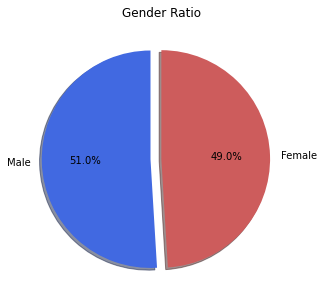

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_data_df['Sex'].value_counts()

labels = gender_count.index
ratio = gender_count.values
colors = ['royalblue', 'indianred']
explode = [0.1,0]

gender_count.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90, figsize=(5,5))
plt.title('Gender Ratio')
plt.ylabel('')
plt.show()

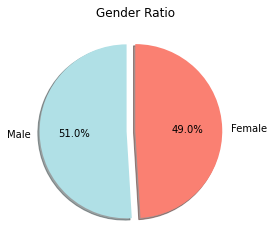

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_data_df['Sex'].value_counts()

labels = gender_count.index
ratio = gender_count.values
colors = ['powderblue', 'salmon']
explode = [0.1,0]

plt.pie(ratio, colors=colors, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)
plt.title('Gender Ratio')
plt.show()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
new_timepoint = pd.DataFrame(clean_data_df.groupby('Mouse ID').max()['Timepoint'].sort_values()).reset_index().rename(columns={'Timepoint':'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_time = pd.merge(clean_data_df, new_timepoint, on='Mouse ID')
merged_drugs_df = merged_time[merged_time['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]
merged_data_df = merged_drugs_df[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Max Timepoint', 'Tumor Volume (mm3)']]


In [111]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_values = []

for drug in treatments:
    temp_drug_df = merged_data_df.loc[merged_data_df['Drug Regimen']==drug]
    end_volume_df = temp_drug_df.loc[temp_drug_df['Timepoint']==temp_drug_df['Max Timepoint']]
              
# Create empty list to fill with tumor vol data (for plotting)
    volume = end_volume_df['Tumor Volume (mm3)']
    treatment_values.append(volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'The Lower Bound for {drug}: {lower_bound}')
    print(f'The Upper Bound for {drug}: {upper_bound}')
    
    outliers_count = (volume.loc[(end_volume_df['Tumor Volume (mm3)']>=upper_bound) |
                               (end_volume_df['Tumor Volume (mm3)']<=lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    print('-----------')

IQR for Capomulin: 7.781863460000004
The Lower Bound for Capomulin: 20.70456164999999
The Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
-----------
IQR for Ramicane: 9.098536719999998
The Lower Bound for Ramicane: 17.912664470000003
The Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
-----------
IQR for Infubinol: 11.477135160000003
The Lower Bound for Infubinol: 36.83290494999999
The Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
-----------
IQR for Ceftamin: 15.577752179999997
The Lower Bound for Ceftamin: 25.355449580000002
The Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
-----------


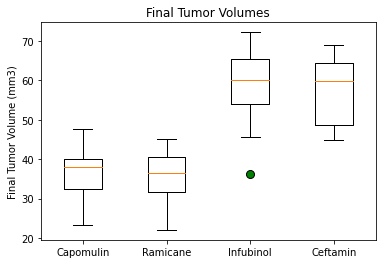

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor = 'g', markersize = 8, markeredgecolor = 'black')

plt.boxplot(treatment_values, flierprops = flierprops)
plt.title('Final Tumor Volumes')
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

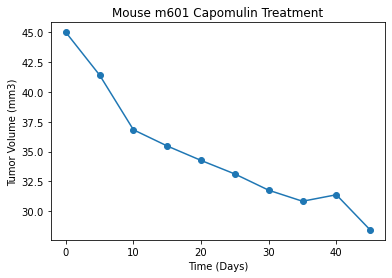

In [113]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = clean_data_df.loc[clean_data_df['Mouse ID']=='m601']

plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse m601 Capomulin Treatment')

plt.show()

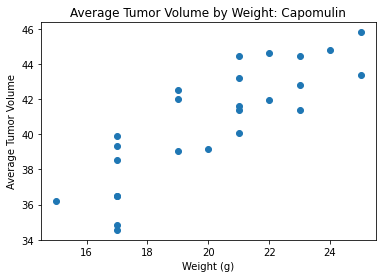

In [114]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen']=='Capomulin']
avg_tumor_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume'})
avg_tumor_vol_df = pd.merge(capomulin_df, avg_tumor_vol_df, on='Mouse ID')
final_vol_df = avg_tumor_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_vol_df

x = final_vol_df['Weight (g)']
y = final_vol_df['Average Tumor Volume']

plt.scatter(x,y)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume by Weight: Capomulin')

plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume on Capomulin is 0.84


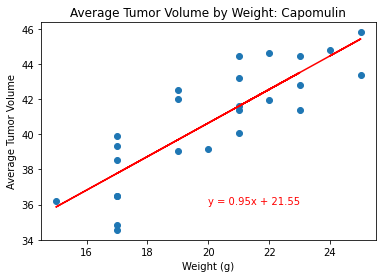

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen']=='Capomulin']
avg_tumor_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume'})
avg_tumor_vol_df = pd.merge(capomulin_df, avg_tumor_vol_df, on='Mouse ID')
final_vol_df = avg_tumor_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_vol_df

x = final_vol_df['Weight (g)']
y = final_vol_df['Average Tumor Volume']

correlation = st.pearsonr(x,y)
print(f'The correlation between weight and average tumor volume on Capomulin is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume by Weight: Capomulin')

plt.show()